In [1]:
download.file('https://d396qusza40orc.cloudfront.net/exdata%2Fdata%2Fhousehold_power_consumption.zip','data.zip',method = "auto", quiet=FALSE)

In [2]:
unzip("data.zip")

In [3]:
my_data <- read.table("household_power_consumption.txt",skip=1,sep=";")

In [4]:
names(my_data) <- c("Date","Time","Global_active_power","Global_reactive_power","Voltage","Global_intensity","Sub_metering_1","Sub_metering_2","Sub_metering_3")

In [5]:
power <- subset(my_data,my_data$Date=="1/2/2007" | my_data$Date =="2/2/2007")

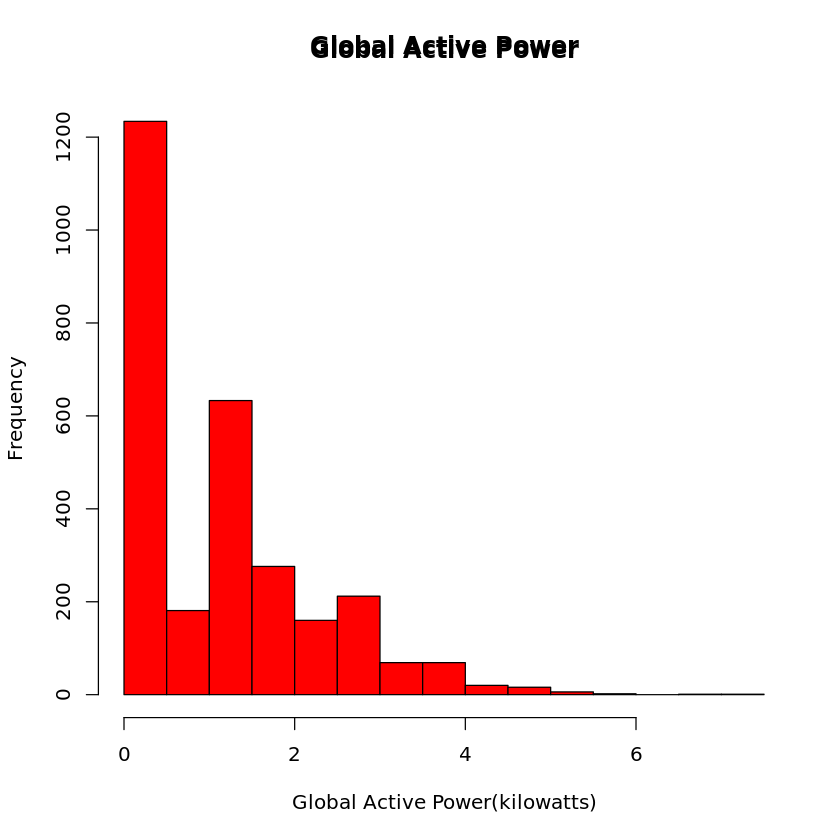

In [6]:
hist(as.numeric(as.character(power$Global_active_power)),col="red",main="Global Active Power",xlab="Global Active Power(kilowatts)")
title(main="Global Active Power")

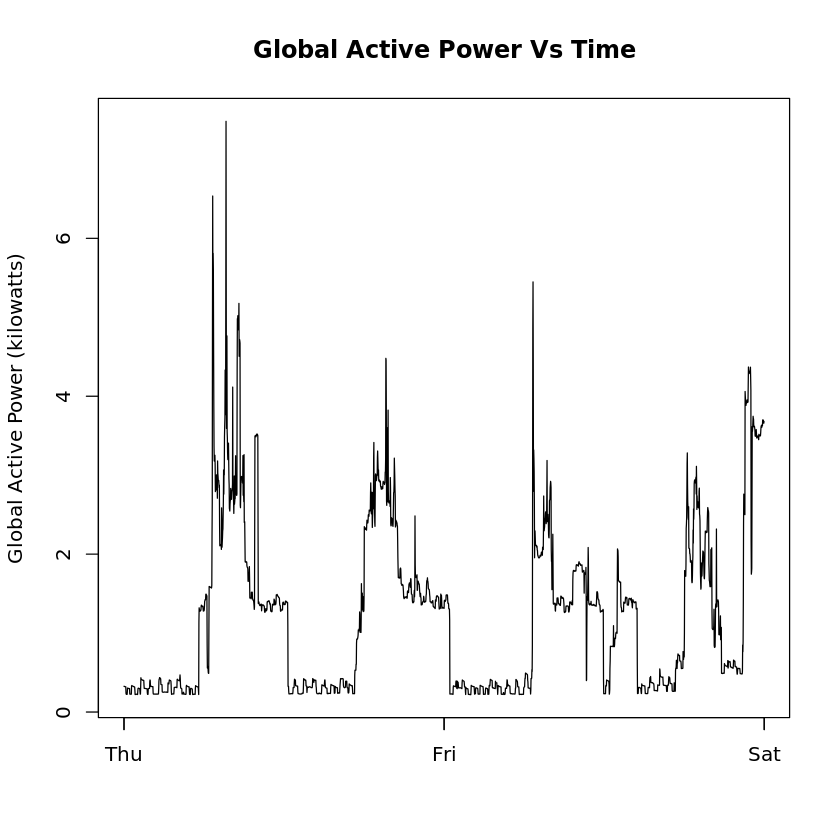

In [7]:
power$Date <- as.Date(power$Date, format="%d/%m/%Y")
power$Time <- strptime(power$Time, format="%H:%M:%S")
power[1:1440,"Time"] <- format(power[1:1440,"Time"],"2007-02-01 %H:%M:%S")
power[1441:2880,"Time"] <- format(power[1441:2880,"Time"],"2007-02-02 %H:%M:%S")
plot(power$Time,as.numeric(as.character(power$Global_active_power)),type="l",xlab="",ylab="Global Active Power (kilowatts)") 
title(main="Global Active Power Vs Time")

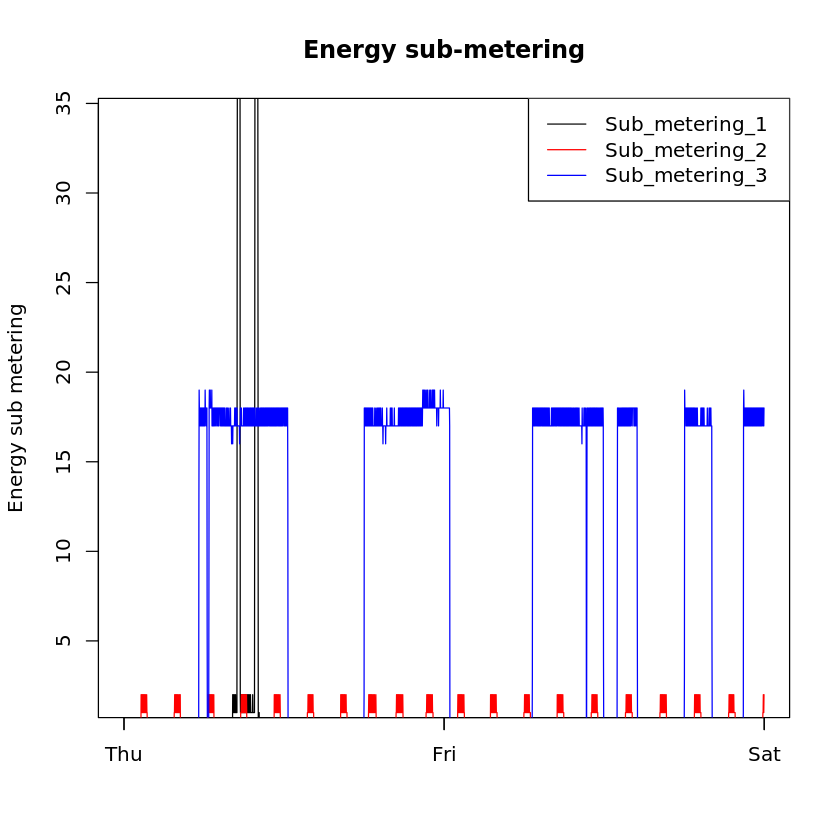

In [8]:
plot(power$Time,power$Sub_metering_1,type="n",xlab="",ylab="Energy sub metering")
with(power,lines(Time,as.numeric(as.character(Sub_metering_1))))
with(power,lines(Time,as.numeric(as.character(Sub_metering_2)),col="red"))
with(power,lines(Time,as.numeric(as.character(Sub_metering_3)),col="blue"))
legend("topright", lty=1, col=c("black","red","blue"),legend=c("Sub_metering_1","Sub_metering_2","Sub_metering_3"))
title(main="Energy sub-metering")

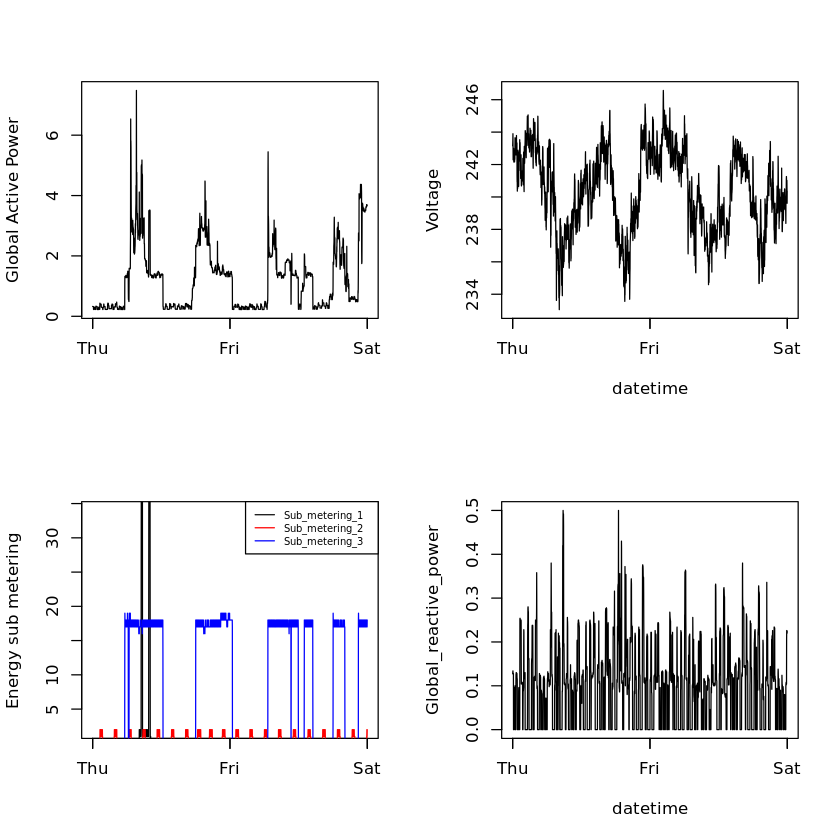

In [9]:
par(mfrow=c(2,2))

with(power,{
  plot(power$Time,as.numeric(as.character(power$Global_active_power)),type="l",  xlab="",ylab="Global Active Power")  
  plot(power$Time,as.numeric(as.character(power$Voltage)), type="l",xlab="datetime",ylab="Voltage")
  plot(power$Time,power$Sub_metering_1,type="n",xlab="",ylab="Energy sub metering")
   with(power,lines(Time,as.numeric(as.character(Sub_metering_1))))
   with(power,lines(Time,as.numeric(as.character(Sub_metering_2)),col="red"))
   with(power,lines(Time,as.numeric(as.character(Sub_metering_3)),col="blue"))
   legend("topright", lty=1, col=c("black","red","blue"),legend=c("Sub_metering_1","Sub_metering_2","Sub_metering_3"), cex = 0.6)
  plot(power$Time,as.numeric(as.character(power$Global_reactive_power)),type="l",xlab="datetime",ylab="Global_reactive_power")
})